# Создаём гифки

In [1]:
import os
import glob
import imageio

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import scipy.stats as sts
plt.style.use('ggplot')   # Правильный стиль графиков   

%matplotlib inline

images = 'images/'

In [2]:
def create_animated_gif(files, animated_gif_name, pause=0):
    if pause != 0:
        # Load the gifs up several times in the array, to slow down the animation
        frames = []
        for file in files:
            count = 0
            while count < pause:
                frames.append(file)
                count+=1
        print("Total number of frames in the animation:", len(frames))
        files = frames
    images = [imageio.imread(file) for file in files]
    imageio.mimsave(animated_gif_name, images, duration = 0.005)

In [3]:
for f in glob.glob("images/*.png"):
    os.remove(f)

### 1. Закон больших чисел

In [ ]:
x = [ ]
y = [ ]
s = 0

for i in range(100):
    x.append(i)
    s += np.random.choice([1,2,3,4,5,6])
    y.append(s/len(x))
    
    fig, ax = plt.subplots()
    ax.set_xlabel('Число побрасываний')
    ax.set_ylabel('Среднее')
    ax.set_ylim(1,6)
    ax.set_xlim(0,100)

    ax.plot(x, y)
    ax.plot(list(range(100)),[3.5]*100)
    
    fig.savefig('images/{}.png'.format(i), dpi=80)
    

In [ ]:
pause = 1
animated_gif_name = 'animation_LLN.gif'

In [103]:
image_path = 'images/*.png'
files = glob.glob(image_path)
files = sorted(files, key = lambda w: int(w.split('/')[-1].split('.')[0]))
create_animated_gif(files, animated_gif_name, pause)

Total number of frames in the animation: 100


![](animation_LLN.gif)

### 2. ЦПТ 

In [ ]:
#rv = sts.uniform(loc=0, scale=1)
rv = sts.chi2(1)

x = np.zeros(10000)
for i in range(1,100):
    x += rv.rvs(10000)
    #y = (x - i*0.5)*np.sqrt(12)/np.sqrt(i)
    y = (x - i*1)/((2*i)**0.5)
    fig, ax = plt.subplots()
    #ax.set_xlabel('Число побрасываний')
    #ax.set_ylabel('Среднее')
    ax.set_ylim(0,0.5)
    ax.set_xlim(-5,5)

    ax.hist(y, bins=40,normed=True,color='grey', alpha=0.8, label = '$n=%s$' % i) 
    
    mu = 0 # Находим мат ожидание и дисперсию на википедии! 
    sigma = 1
    norm_rv = sts.norm(loc=mu, scale=sigma)  # Генерим нормальное распределение
    z = np.linspace(-5,5,100)                # Решётка для прорисовки графика
    pdf = norm_rv.pdf(z)
    ax.plot(z, pdf, lw=3, color='blue')
    ax.legend()  # Добавляем легенду и подписываем оси
    fig.savefig('images/{}.png'.format(i), dpi=80)

In [78]:
pause = 1
animated_gif_name = 'animation_CPT_2.gif'

In [79]:
image_path = 'images/*.png'
files = glob.glob(image_path)
files = sorted(files, key = lambda w: int(w.split('/')[-1].split('.')[0]))
create_animated_gif(files, animated_gif_name, pause)

Total number of frames in the animation: 99


![](animation_CPT_2.gif)

## 3. Смещение и ящик с усами

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns

rv = sts.norm(loc=300, scale=100)
x = rv.rvs(10000)

def get_means(size):
    th_od = [ ]
    th_pe = [ ]
    th_ap = [ ]
    
    for i in range(100):
        x_sample = np.random.choice(x, size=size, replace=False)
        th_od.append(np.mean(x_sample))
        th_pe.append(np.mean(x_sample) - 4200/size)
        th_ap.append(np.mean(x_sample) - 5*(size + 1)/size)
        
    return th_od, th_pe, th_ap

In [ ]:
for size in range(50, 4300, 50):
    th_od, th_pe, th_ap =  get_means(size)
    df = pd.DataFrame([th_od + th_pe + th_ap, 
                      ['Odahingum']*len(th_od) + ['Pappina']*len(th_pe) + ['Opanovi']*len(th_ap)]).T
    df.columns = ['mammoth', 'who']
    df.mammoth = df.mammoth.astype(float)

    fig, axes = plt.subplots(1, 1, sharey=True, figsize=(8,8))
    sns.boxplot(x='mammoth', y='who', data=df, ax=axes)
    axes.set_xlim(270,320)
    fig.savefig('images/{}.png'.format(size), dpi=80)

In [102]:
pause = 1
animated_gif_name = 'animation_boxplot.gif'

In [103]:
image_path = 'images/*.png'
files = glob.glob(image_path)
files = sorted(files, key = lambda w: int(w.split('/')[-1].split('.')[0]))
create_animated_gif(files, animated_gif_name, pause)

Total number of frames in the animation: 85


![](animation_boxplot.gif)

## 4. Сходимость по вероятности

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

mu = 2
sigma = 0.05

#rv = sts.norm(loc=mu, scale=sigma)
rv = sts.cauchy(loc=mu, scale=sigma)
n = 200

eps1 = 0.1
eps2 = 0.05

xx = [ ]
y = [ ]
p1 = [ ]
p2 = [ ]
var_y = [ ]

for i in range(1,n):
    # генерим среднее
    x = rv.rvs(i)
    xx.append(i)
    y.append(np.mean(x))

    # вероятность пробить тоннель
    z = [ ]
    for j in range(1000):
        z.append(np.mean(rv.rvs(i)))
    p1.append(np.sum(np.abs(np.array(z)) > mu + eps1)/1000)
    p2.append(np.sum(np.abs(np.array(z)) > mu + eps2)/1000)
    var_y.append(np.var(z))
    
    
    fig, ax = plt.subplots(1,3,figsize=(16, 4))

    # среднее
    ax[0].set_xlabel('Число наблюдений')
    ax[0].set_ylabel('Среднее')
    ax[0].set_ylim(1.2,2.7)
    ax[0].set_xlim(1,n)
    ax[0].plot(xx, y,  label = 'среднее')
    ax[0].plot(list(range(1,n)),[2]*(n-1), lw=3,  label = 'математическое ожидание')
    ax[0].plot(list(range(1,n)),[2 + eps1]*(n-1), lw=2, linestyle='dashed', color="g", label = 'окно 0.1')
    ax[0].plot(list(range(1,n)),[2 - eps1]*(n-1), lw=2, linestyle='dashed', color="g")
    ax[0].plot(list(range(1,n)),[2 + eps2]*(n-1), lw=2, linestyle='dashed', color="c", label = 'окно 0.05')
    ax[0].plot(list(range(1,n)),[2 - eps2]*(n-1), lw=2, linestyle='dashed', color="c")
    ax[0].legend() 
    

    # вероятность пробоины
    ax[1].set_xlabel('Число наблюдений')
    ax[1].set_ylabel('Верояность пробоины')
    ax[1].set_ylim(0,1)
    ax[1].set_xlim(1,n)
    ax[1].plot(xx, p1, color='g',  label = 'окно размера 0.1')
    ax[1].plot(xx, p2, color='c',  label = 'окно размера 0.05')
    ax[1].legend() 

    # дисперсия среднего
    ax[2].set_xlabel('Число наблюдений')
    ax[2].set_ylabel('Дисперсия среднего')
    ax[2].set_ylim(0,3)
    ax[2].set_xlim(1,n)
    ax[2].plot(xx, var_y, color="#ff7f0e",  label = 'дисперсия среднего')
    ax[2].legend() 

    fig.savefig('images/{}.png'.format(i), dpi=80)

In [19]:
pause = 1
animated_gif_name = 'animation_prob_unconv.gif'

In [20]:
image_path = 'images/*.png'
files = glob.glob(image_path)
files = sorted(files, key = lambda w: int(w.split('/')[-1].split('.')[0]))
create_animated_gif(files, animated_gif_name, pause)

Total number of frames in the animation: 199


![](animation_prob_conv.gif)

![](animation_prob_unconv.gif)

## 5. Сходимость по распределению 

### Стьюдент к нормальному

In [ ]:
x = np.linspace(-5,5,100)
rv_limit = sts.norm( )
pdf_limit = rv_limit.pdf(x)
cdf_limit = rv_limit.cdf(x)

for k in range(1,30):
    rv = sts.t(df=k)
    pdf = rv.pdf(x)
    cdf = rv.cdf(x) 
    
    fig, ax = plt.subplots(1,2,figsize=(16, 4))    
    ax[0].set_ylim(-0.03,0.45)
    ax[0].plot(x, pdf, label="$t(k=%s)$" % k, lw=1.2)
    ax[0].plot(x, pdf_limit, label='N(0,1)', linestyle='dashed', lw=2)
    ax[0].set_title("Плотность распределения (PDF)")
    ax[0].legend() 

    ax[1].set_ylim(-0.1,1.1)
    ax[1].plot(x, cdf, label="$t(k=%s)$" % k, lw=1.2)
    ax[1].plot(x, cdf_limit, label='N(0,1)', linestyle='dashed', lw=2)
    ax[1].set_title("Функция распределения (CDF)")
    ax[1].legend() 
    
    fig.savefig('images/{}.png'.format(k), dpi=80)

In [76]:
pause = 1
animated_gif_name = 'animation_convdist_student.gif'

In [77]:
image_path = 'images/*.png'
files = glob.glob(image_path)
files = sorted(files, key = lambda w: int(w.split('/')[-1].split('.')[0]))
create_animated_gif(files, animated_gif_name, pause)

Total number of frames in the animation: 29


![](animation_convdist_student.gif)

### Максимум из равноверных

In [ ]:
x = np.linspace(0,1,100)
rv_limit = sts.norm( )
pdf_limit = rv_limit.pdf(x)
cdf_limit = rv_limit.cdf(x)

for k in range(1,50):    
    pdf = k*(1 - x)**(k-1)
    cdf = 1 - (1 - x)**k
    
    fig, ax = plt.subplots(1,2,figsize=(16, 4))    
    ax[0].set_ylim(-0.1,10.1)
    ax[0].plot(x, pdf, label="$1 - max(X_1, \ldots, X_{%s})$" % k, lw=1.2)
    # ax[0].plot(x, pdf_limit, label='N(0,1)', linestyle='dashed', lw=2)
    ax[0].set_title("Плотность распределения (PDF)")
    ax[0].legend() 

    ax[1].set_ylim(-0.1,1.1)
    ax[1].plot(x, cdf, label="$1 - max(X_1, \ldots, X_{%s})$" % k, lw=1.2)
    # ax[1].plot(x, cdf_limit, label='N(0,1)', linestyle='dashed', lw=2)
    ax[1].set_title("Функция распределения (CDF)")
    ax[1].legend() 
    
    fig.savefig('images/{}.png'.format(k), dpi=80)

In [118]:
pause = 1
animated_gif_name = 'animation_convdist_unif_1.gif'

In [119]:
image_path = 'images/*.png'
files = glob.glob(image_path)
files = sorted(files, key = lambda w: int(w.split('/')[-1].split('.')[0]))
create_animated_gif(files, animated_gif_name, pause)

Total number of frames in the animation: 49


![](animation_convdist_unif_1.gif)

То же самое, но пронормированное на $n$ и из-за этого сходящееся к экспоненциальному.

In [ ]:
x = np.linspace(0,1,100)
rv_limit = sts.expon()
pdf_limit = rv_limit.pdf(x)
cdf_limit = rv_limit.cdf(x)

for k in range(1,30):    
    pdf = (1 - x/k)**(k-1)
    cdf = 1 - (1 - x/k)**k
    
    fig, ax = plt.subplots(1,2,figsize=(16, 4))    
    ax[0].set_ylim(-0.1,1.1)
    ax[0].plot(x, pdf, label="$n \cdot (1 - max(X_1, \ldots, X_{%s}))$" % k, lw=1.2)
    ax[0].plot(x, pdf_limit, label='Exp(1)', linestyle='dashed', lw=2)
    ax[0].set_title("Плотность распределения (PDF)")
    ax[0].legend() 

    ax[1].set_ylim(-0.1,1.1)
    ax[1].plot(x, cdf, label="$n \cdot (1 - max(X_1, \ldots, X_{%s}))$" % k, lw=1.2)
    ax[1].plot(x, cdf_limit, label='Exp(1)', linestyle='dashed', lw=2)
    ax[1].set_title("Функция распределения (CDF)")
    ax[1].legend() 
    
    fig.savefig('images/{}.png'.format(k), dpi=80)

In [128]:
pause = 1
animated_gif_name = 'animation_convdist_unif_exp.gif'

In [129]:
image_path = 'images/*.png'
files = glob.glob(image_path)
files = sorted(files, key = lambda w: int(w.split('/')[-1].split('.')[0]))
create_animated_gif(files, animated_gif_name, pause)

Total number of frames in the animation: 29


![](animation_convdist_unif_exp.gif)

### Пуассон

# 6. Сходимость в среднем vs по вероятности

1. Когда есть одно, но нет второго 
2. Когда есть оба

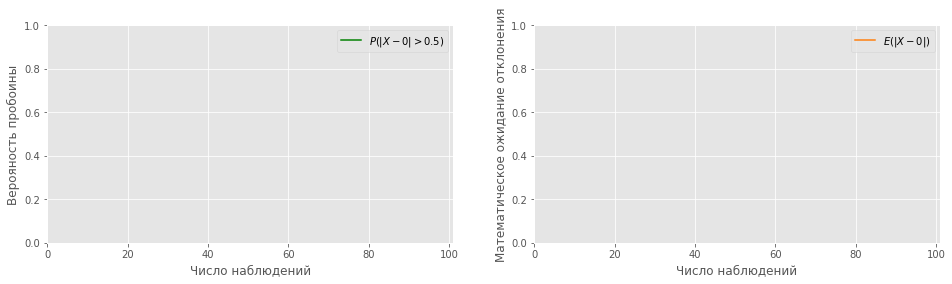

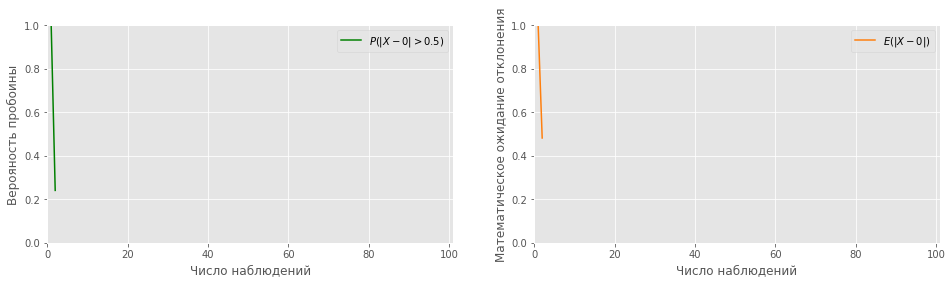

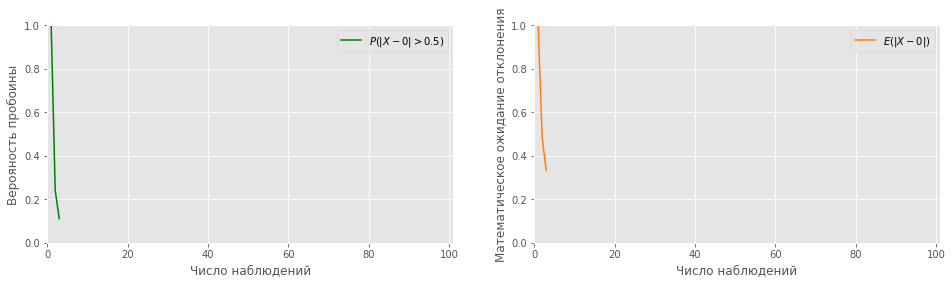

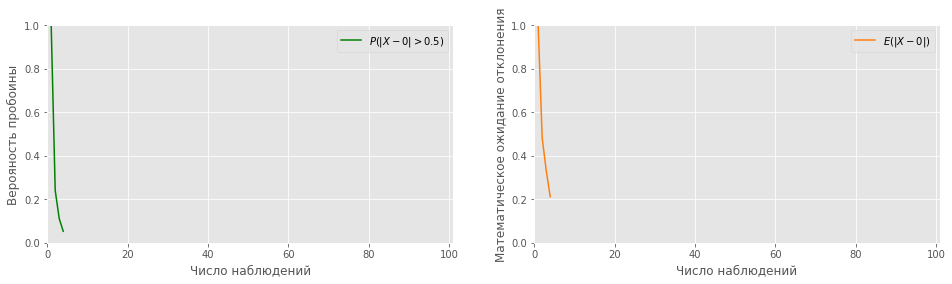

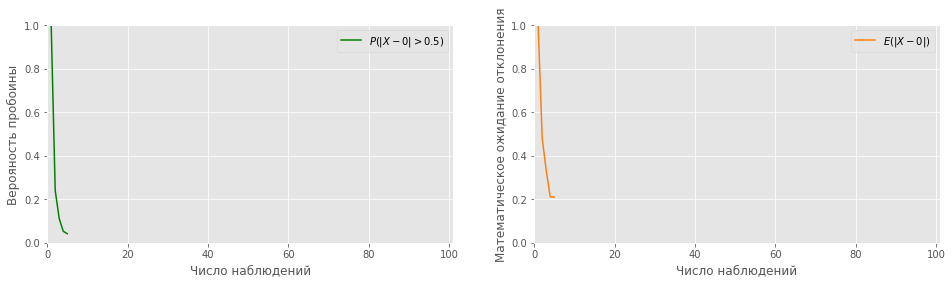

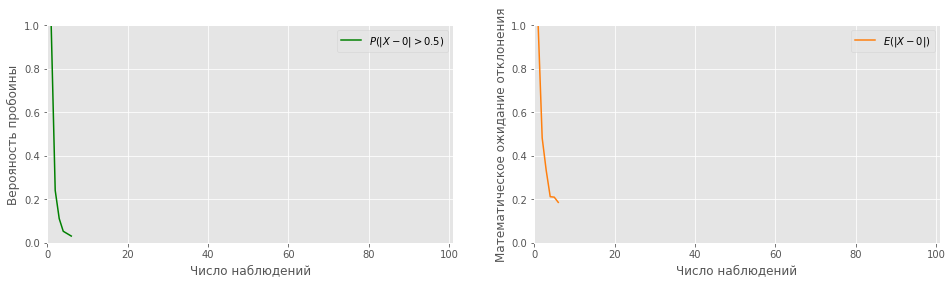

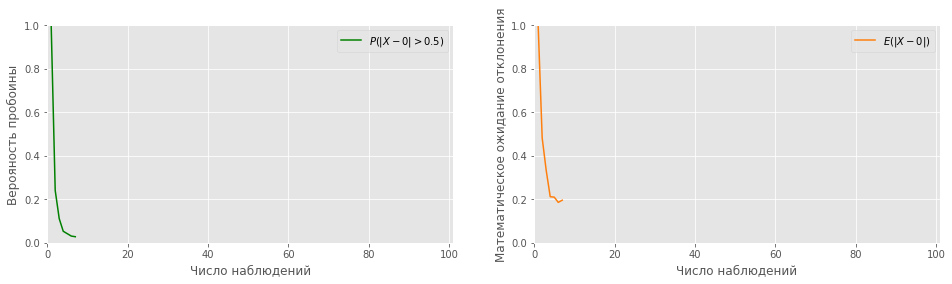

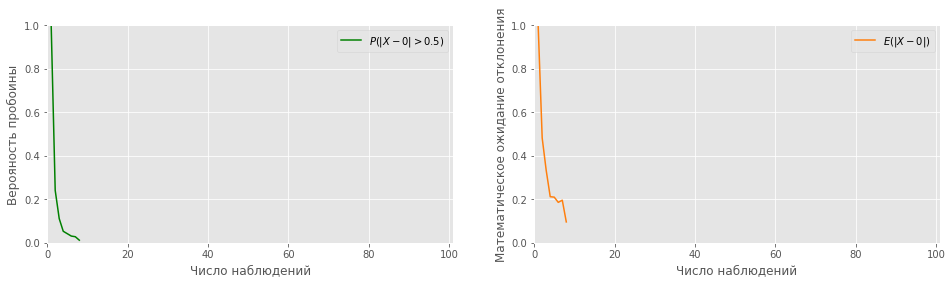

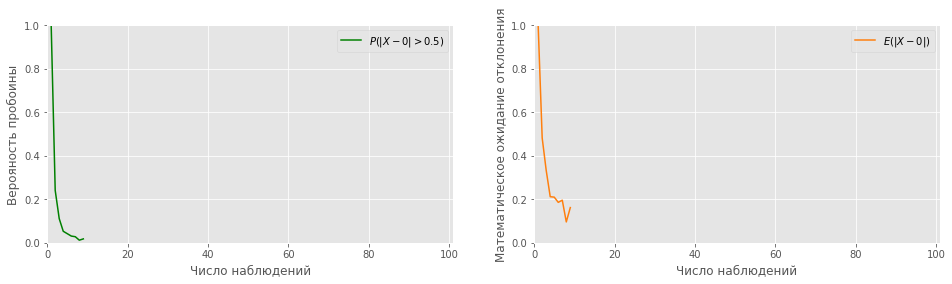

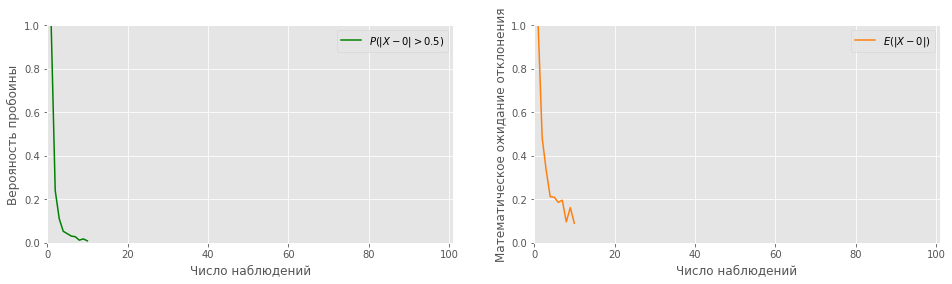

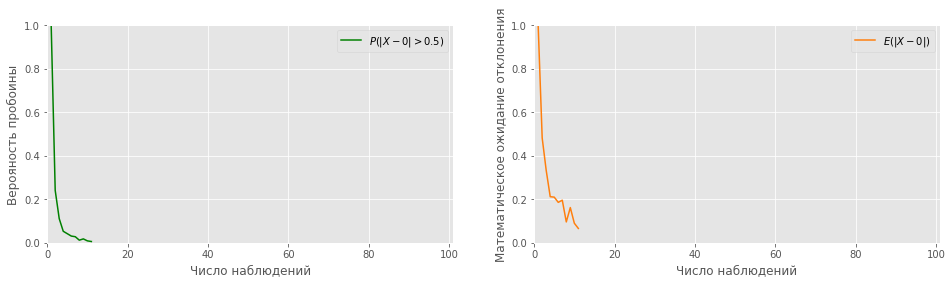

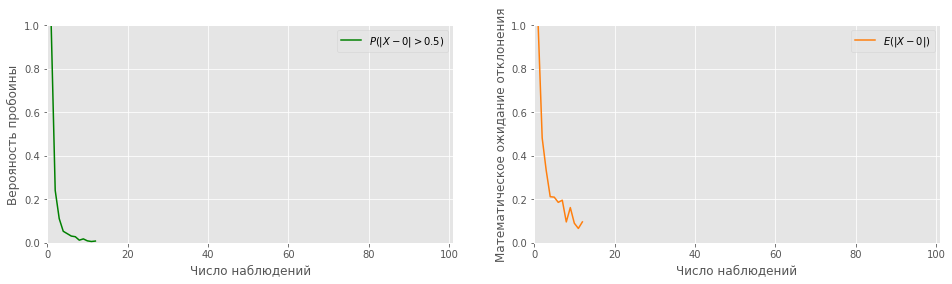

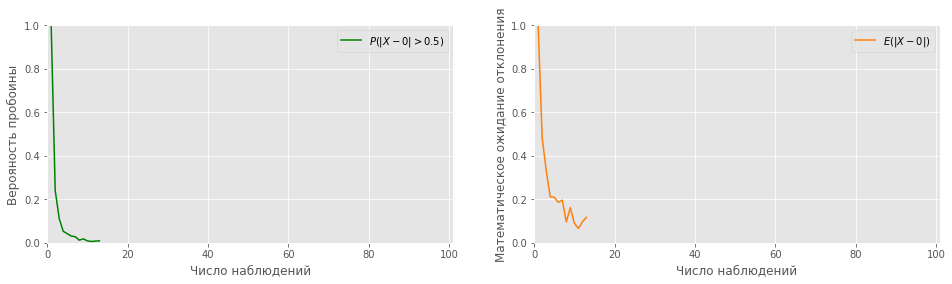

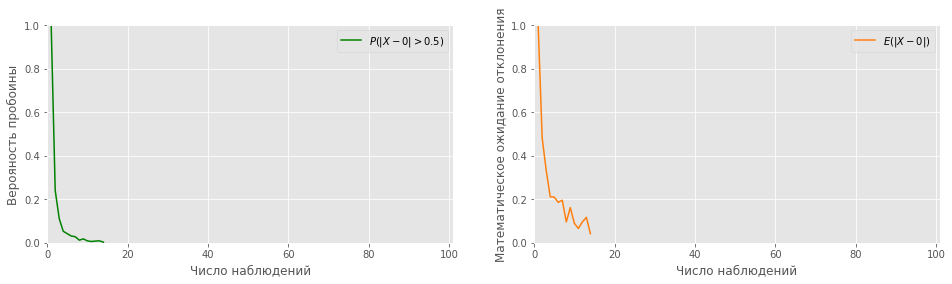

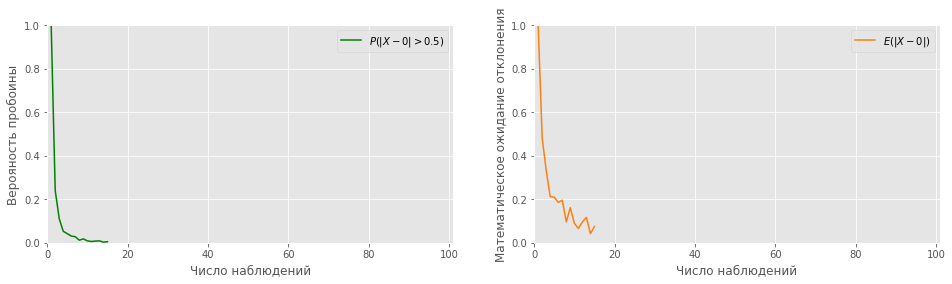

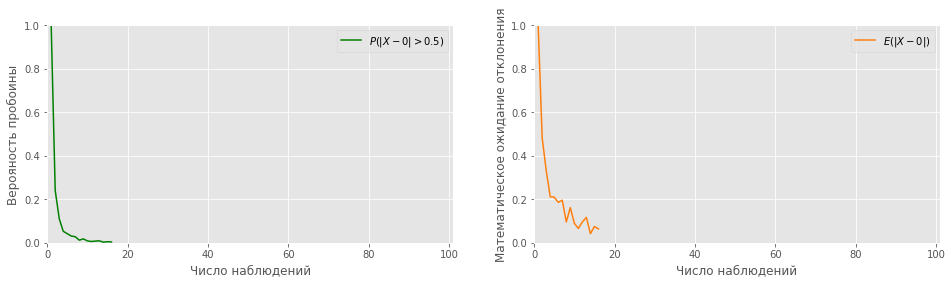

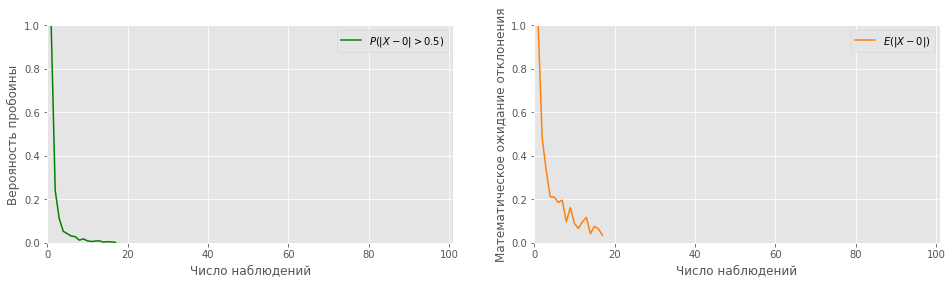

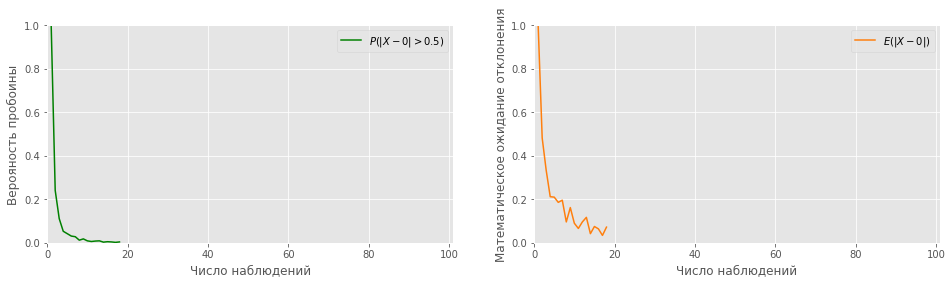

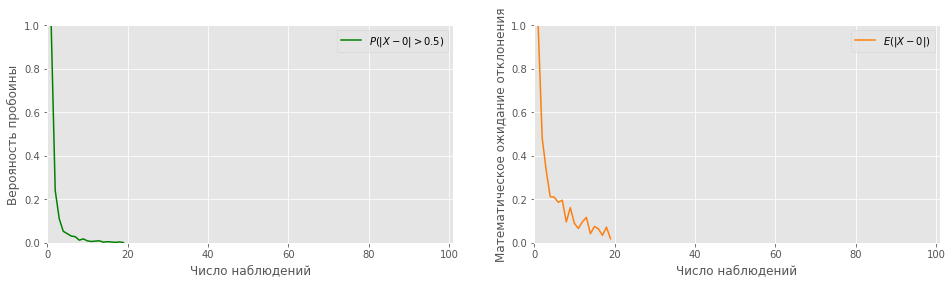

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

n_obs = 1000
eps = 0.5

ev = [ ] # вектор для средних 
pr = [ ] # вектор для вероятностей 

for i in range(1,101):
    x = np.random.choice([i,0], size=n_obs, replace=True, p=[1/i**2, 1- 1/i**2])
    ev.append(np.mean(x))
    pr.append(np.mean(x > eps))
    
    fig, ax = plt.subplots(1,2,figsize=(16, 4))

    # вероятность пробоины
    ax[0].set_xlabel('Число наблюдений')
    ax[0].set_ylabel('Верояность пробоины')
    ax[0].set_xlim(0,101)
    ax[0].set_ylim(0,1)
    ax[0].plot(list(range(1,i+1)), pr, color='g',  label = "$P(|X - 0| > 0.5)$")
    ax[0].legend() 

    # дисперсия среднего
    ax[1].set_xlabel('Число наблюдений')
    ax[1].set_ylabel('Математическое ожидание отклонения')
    ax[1].set_xlim(0,101)
    # ax[1].set_ylim(0,200)
    ax[1].set_ylim(0,1)
    ax[1].plot(list(range(1,i+1)), ev, color="#ff7f0e",  label = "$E(|X-0|)$")
    ax[1].legend() 

    fig.savefig('images/{}.png'.format(i), dpi=80)

In [ ]:
pause = 1
animated_gif_name = 'animation_convprob_vs_convmean_yes.gif'

In [ ]:
image_path = 'images/*.png'
files = glob.glob(image_path)
files = sorted(files, key = lambda w: int(w.split('/')[-1].split('.')[0]))
create_animated_gif(files, animated_gif_name, pause)

## План по гифкам: 

* Гифка про пуассона и тп 